TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


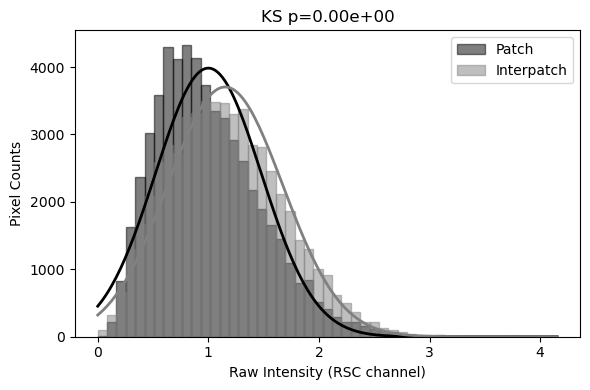

In [5]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm

# List of animal IDs
animal_ids = [99, 118, 80, 82]

# Paths relative to the current directory (adjust as needed)
base_path = "."  # or whatever your base directory is

# We'll store intensities in these lists to combine them
accum_patch_intensities = []
accum_interpatch_intensities = []

for aid in animal_ids:
    # Construct file paths
    # e.g., "./99/left_bottom/RSC.tif", etc.
    rsc_path = f"{base_path}/{aid}/left_bottom/RSC.tif"
    patchmask_path = f"{base_path}/{aid}/left_bottom/patchmask.tif"
    interpatchmask_path = f"{base_path}/{aid}/left_bottom/interpatchmask.tif"

    # Load the RSC image (grayscale) and the two masks
    rsc_img = tifffile.imread(rsc_path)
    patchmask_img = tifffile.imread(patchmask_path)
    interpatchmask_img = tifffile.imread(interpatchmask_path)

    # Convert masks to boolean arrays
    # If they are strictly 0=black, 255=white:
    patch_mask = (patchmask_img == 255)
    interpatch_mask = (interpatchmask_img == 255)
    
    # Extract intensities
    patch_vals = rsc_img[patch_mask]
    interpatch_vals = rsc_img[interpatch_mask]

    # Append to the global lists
    accum_patch_intensities.append(patch_vals)
    accum_interpatch_intensities.append(interpatch_vals)

# Now combine them across animals into single arrays
patch_all = np.concatenate(accum_patch_intensities)
interpatch_all = np.concatenate(accum_interpatch_intensities)

# (Optional) Normalization step:
# In Figure L, intensities might be normalized to the "patch mean" (per image).
# If you want to replicate that exactly:
# 1) For each animal, compute patch mean -> normalize that animal's RSC intensities -> accumulate.
accum_patch_intensities = []
accum_interpatch_intensities = []

for aid in animal_ids:
    ...
    patch_vals = rsc_img[patch_mask]
    interpatch_vals = rsc_img[interpatch_mask]

    patch_mean = patch_vals.mean()  # The reference

    # Normalize
    patch_vals_norm = patch_vals / patch_mean
    interpatch_vals_norm = interpatch_vals / patch_mean

    accum_patch_intensities.append(patch_vals_norm)
    accum_interpatch_intensities.append(interpatch_vals_norm)

patch_all = np.concatenate(accum_patch_intensities)
interpatch_all = np.concatenate(accum_interpatch_intensities)

# Then proceed with histogram/plot as above.


# Let's do a histogram comparison
# We'll define some bins or let numpy choose automatically
bins = np.linspace(0, np.max([patch_all.max(), interpatch_all.max()]), 50)

plt.figure(figsize=(6,4))

plt.hist(patch_all, bins=bins, alpha=0.5, color='black', edgecolor='black', label='Patch')
plt.hist(interpatch_all, bins=bins, alpha=0.5, color='gray', edgecolor='gray', label='Interpatch')

plt.xlabel("Raw Intensity (RSC channel)")
plt.ylabel("Pixel Counts")
plt.legend()

# (Optional) Fit Gaussian and do KS test
mean_patch, std_patch = norm.fit(patch_all)
mean_inter, std_inter = norm.fit(interpatch_all)

x = np.linspace(0, bins[-1], 200)
pdf_patch = norm.pdf(x, mean_patch, std_patch)
pdf_patch_scaled = pdf_patch * len(patch_all) * (bins[1] - bins[0])
pdf_inter = norm.pdf(x, mean_inter, std_inter)
pdf_inter_scaled = pdf_inter * len(interpatch_all) * (bins[1] - bins[0])

plt.plot(x, pdf_patch_scaled, 'k-', lw=2)
plt.plot(x, pdf_inter_scaled, 'gray', lw=2)

ks_stat, p_value = ks_2samp(patch_all, interpatch_all)
plt.title(f"KS p={p_value:.2e}")

plt.tight_layout()
plt.show()


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


./99/left_bottom
./99/left_middle
./99/left_upper
./118/left_bottom
./118/left_middle
./118/left_upper
./80/left_bottom
./80/left_middle
./80/left_upper
./82/left_bottom
./82/left_middle
./82/left_upper


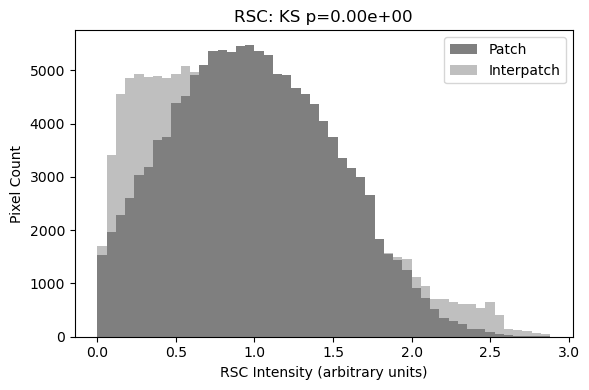

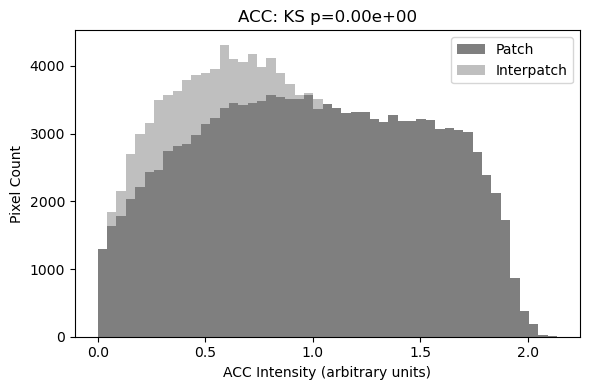

In [14]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm

# 1. Define your animal IDs and region names
animal_ids = [99, 118, 80, 82]
region_names = ["left_bottom", "left_middle", "left_upper"]
areas = ["RSC", "ACC"]  # the two TIFF images in each region

# 2. Prepare a data structure to store intensities
#    We'll create a nested dictionary, something like:
#    data["RSC"]["patch"] = [array_of_intensities_across_all_animals_and_regions]
#    data["ACC"]["interpatch"] = [ ... ] etc.
data = {}
for area in areas:
    data[area] = {
        "patch": [],
        "interpatch": []
    }

# 3. Loop over each animal and each region, load images & masks, collect intensities
for aid in animal_ids:
    for region in region_names:
        base_dir = f"./{aid}/{region}"
        print(base_dir)

        # File paths
        rsc_path = f"{base_dir}/RSC.tif"
        acc_path = f"{base_dir}/ACC.tif"
        patchmask_path = f"{base_dir}/patchmask.tif"
        interpatchmask_path = f"{base_dir}/interpatchmask.tif"

        # Load images (2D arrays)
        rsc_img = tifffile.imread(rsc_path)
        acc_img = tifffile.imread(acc_path)
        patchmask_img = tifffile.imread(patchmask_path)
        interpatchmask_img = tifffile.imread(interpatchmask_path)

        # Convert mask to boolean (assuming white=255 => True)
        patch_mask = (patchmask_img == 255)
        interpatch_mask = (interpatchmask_img == 255)

        # Extract intensities for RSC
        rsc_patch_vals = rsc_img[patch_mask]
        rsc_interpatch_vals = rsc_img[interpatch_mask]

        # Extract intensities for ACC
        acc_patch_vals = acc_img[patch_mask]
        acc_interpatch_vals = acc_img[interpatch_mask]

        # Normalization
        rsc_patch_mean = rsc_patch_vals.mean()
        # Avoid dividing by zero if patch is empty
        if rsc_patch_mean > 0:
            rsc_patch_vals = rsc_patch_vals / rsc_patch_mean
            rsc_interpatch_vals = rsc_interpatch_vals / rsc_patch_mean
        
        acc_patch_mean = acc_patch_vals.mean()
        if acc_patch_mean > 0:
            acc_patch_vals = acc_patch_vals / acc_patch_mean
            acc_interpatch_vals = acc_interpatch_vals / acc_patch_mean


        # Append to our data structure
        data["RSC"]["patch"].append(rsc_patch_vals)
        data["RSC"]["interpatch"].append(rsc_interpatch_vals)

        data["ACC"]["patch"].append(acc_patch_vals)
        data["ACC"]["interpatch"].append(acc_interpatch_vals)

# 4. Concatenate intensities across all animals/regions for each area
for area in areas:
    data[area]["patch"] = np.concatenate(data[area]["patch"])
    data[area]["interpatch"] = np.concatenate(data[area]["interpatch"])

# Now data["RSC"]["patch"] is a single 1D array of all RSC patch intensities
# across animals & regions; same for data["RSC"]["interpatch"], data["ACC"]["patch"], etc.

###################################
# 5. Example: Plot Figure-L–style for RSC
###################################
rsc_patch_all = data["RSC"]["patch"]
rsc_interpatch_all = data["RSC"]["interpatch"]

# Let's define bins automatically or manually
max_val_rsc = max(rsc_patch_all.max(), rsc_interpatch_all.max())
bins = np.linspace(0, max_val_rsc, 50)

plt.figure(figsize=(6,4))
plt.hist(rsc_patch_all, bins=bins, alpha=0.5, color='black', label='Patch')
plt.hist(rsc_interpatch_all, bins=bins, alpha=0.5, color='gray', label='Interpatch')

plt.xlabel("RSC Intensity (arbitrary units)")
plt.ylabel("Pixel Count")
plt.legend()

# (Optional) Fit a Gaussian, do a KS test
mu_patch, sigma_patch = norm.fit(rsc_patch_all)
mu_inter, sigma_inter = norm.fit(rsc_interpatch_all)
ks_stat, p_value = ks_2samp(rsc_patch_all, rsc_interpatch_all)
plt.title(f"RSC: KS p={p_value:.2e}")

plt.tight_layout()
plt.show()

###################################
# 6. Similarly, plot for ACC
###################################
acc_patch_all = data["ACC"]["patch"]
acc_interpatch_all = data["ACC"]["interpatch"]

max_val_acc = max(acc_patch_all.max(), acc_interpatch_all.max())
bins_acc = np.linspace(0, max_val_acc, 50)

plt.figure(figsize=(6,4))
plt.hist(acc_patch_all, bins=bins_acc, alpha=0.5, color='black', label='Patch')
plt.hist(acc_interpatch_all, bins=bins_acc, alpha=0.5, color='gray', label='Interpatch')

plt.xlabel("ACC Intensity (arbitrary units)")
plt.ylabel("Pixel Count")
plt.legend()

mu_patch_acc, sigma_patch_acc = norm.fit(acc_patch_all)
mu_inter_acc, sigma_inter_acc = norm.fit(acc_interpatch_all)
ks_stat_acc, p_value_acc = ks_2samp(acc_patch_all, acc_interpatch_all)
plt.title(f"ACC: KS p={p_value_acc:.2e}")

plt.tight_layout()
plt.show()


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


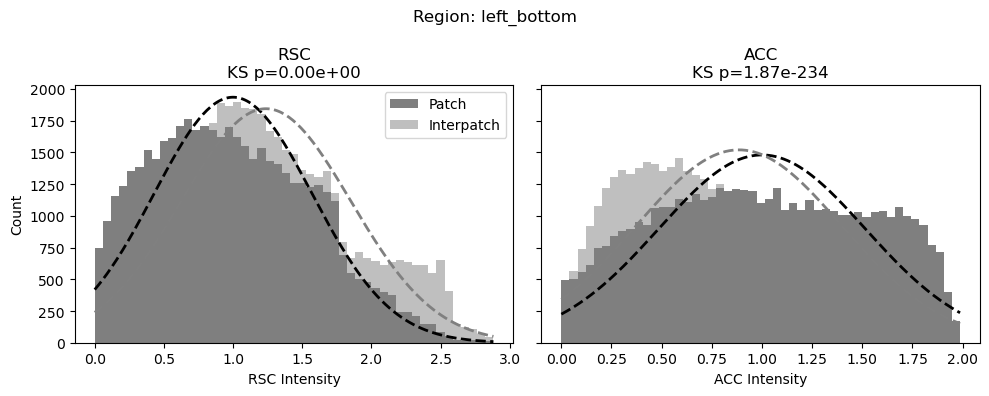

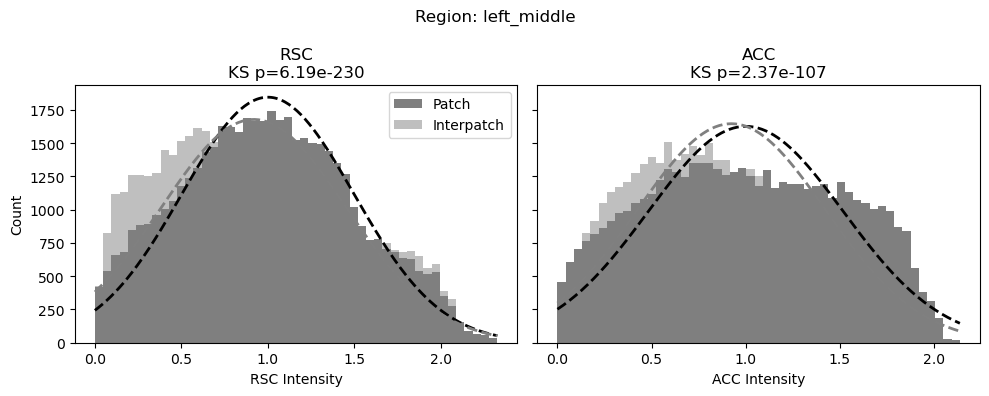

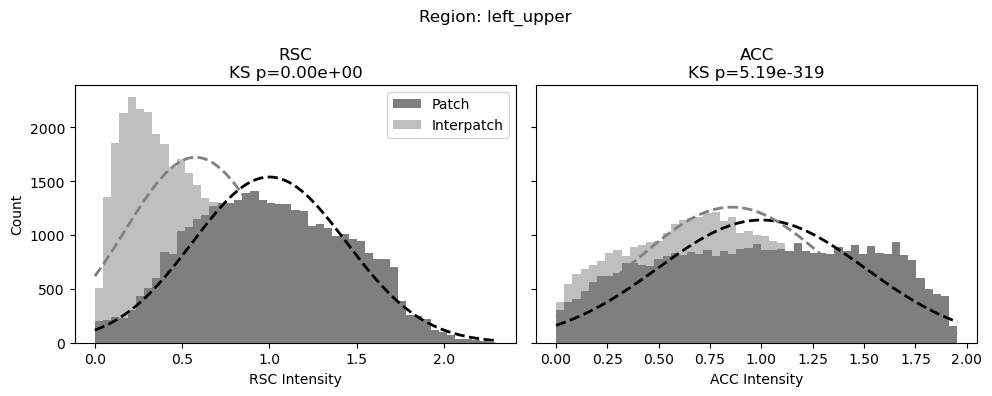

In [18]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm

#############################################
# 1. Define your parameters
#############################################

animal_ids = [99, 118, 80, 82]   # Example animal IDs
region_names = ["left_bottom", "left_middle", "left_upper"] 
areas = ["RSC", "ACC"]           # We have RSC.tif and ACC.tif in each region folder

#############################################
# 2. Create a data structure to store intensities 
#    separately for each region and area.
#############################################
data = {}

# We'll store data like:
#   data[region][area]["patch"]      -> list of arrays of patch intensities
#   data[region][area]["interpatch"] -> list of arrays of interpatch intensities
for region in region_names:
    data[region] = {}
    for area in areas:
        data[region][area] = {
            "patch": [],
            "interpatch": []
        }

#############################################
# 3. Loop over each animal & region, load images & masks, collect intensities
#############################################

for aid in animal_ids:
    for region in region_names:
        base_dir = f"./{aid}/{region}"

        # Construct file paths
        # e.g., ./99/left_bottom/RSC.tif, etc.
        rsc_path = f"{base_dir}/RSC.tif"
        acc_path = f"{base_dir}/ACC.tif"
        patch_path = f"{base_dir}/patchmask.tif"
        interpatch_path = f"{base_dir}/interpatchmask.tif"

        # Read the 2D images
        rsc_img = tifffile.imread(rsc_path)
        acc_img = tifffile.imread(acc_path)
        patch_img = tifffile.imread(patch_path)
        interpatch_img = tifffile.imread(interpatch_path)

        # Convert mask to boolean (assuming white=255, black=0)
        patch_mask = (patch_img == 255)
        interpatch_mask = (interpatch_img == 255)

        # Extract intensities for RSC
        rsc_patch_vals = rsc_img[patch_mask]
        rsc_interpatch_vals = rsc_img[interpatch_mask]

        # Extract intensities for ACC
        acc_patch_vals = acc_img[patch_mask]
        acc_interpatch_vals = acc_img[interpatch_mask]

        # Normalization
        rsc_patch_mean = rsc_patch_vals.mean()
        # Avoid dividing by zero if patch is empty
        if rsc_patch_mean > 0:
            rsc_patch_vals = rsc_patch_vals / rsc_patch_mean
            rsc_interpatch_vals = rsc_interpatch_vals / rsc_patch_mean
        
        acc_patch_mean = acc_patch_vals.mean()
        if acc_patch_mean > 0:
            acc_patch_vals = acc_patch_vals / acc_patch_mean
            acc_interpatch_vals = acc_interpatch_vals / acc_patch_mean

        # Append them to our data structure
        data[region]["RSC"]["patch"].append(rsc_patch_vals)
        data[region]["RSC"]["interpatch"].append(rsc_interpatch_vals)

        data[region]["ACC"]["patch"].append(acc_patch_vals)
        data[region]["ACC"]["interpatch"].append(acc_interpatch_vals)

#############################################
# 4. Concatenate intensities for each region & area
#    so we have one big array per region/area/patch-or-interpatch
#############################################
for region in region_names:
    for area in areas:
        # Combine all arrays into one
        data[region][area]["patch"] = np.concatenate(data[region][area]["patch"])
        data[region][area]["interpatch"] = np.concatenate(data[region][area]["interpatch"])

#############################################
# 5. Now let's produce separate histograms per region 
#    (each region will get a figure with RSC and ACC),
#    AND overlay Gaussian curves on each histogram.
#############################################

for region in region_names:
    # Grab the intensities for RSC
    rsc_patch_all = data[region]["RSC"]["patch"]
    rsc_interpatch_all = data[region]["RSC"]["interpatch"]
    # Grab intensities for ACC
    acc_patch_all = data[region]["ACC"]["patch"]
    acc_interpatch_all = data[region]["ACC"]["interpatch"]

    # We'll make a figure with 2 subplots: one for RSC, one for ACC
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    fig.suptitle(f"Region: {region}")

    ########################################
    # RSC subplot
    ########################################
    ax0 = axes[0]
    max_val_rsc = max(rsc_patch_all.max(), rsc_interpatch_all.max())
    bins_rsc = np.linspace(0, max_val_rsc, 50)

    # Plot patch histogram
    counts_patch_rsc, bins_patch_rsc, _ = ax0.hist(
        rsc_patch_all, bins=bins_rsc, alpha=0.5, color='black', label='Patch'
    )
    # Plot interpatch histogram
    counts_inter_rsc, bins_inter_rsc, _ = ax0.hist(
        rsc_interpatch_all, bins=bins_rsc, alpha=0.5, color='gray', label='Interpatch'
    )
    ax0.set_xlabel("RSC Intensity")
    ax0.set_ylabel("Count")
    ax0.legend()

    # Fit Gaussians
    mu_patch_rsc, sigma_patch_rsc = norm.fit(rsc_patch_all)
    mu_inter_rsc, sigma_inter_rsc = norm.fit(rsc_interpatch_all)
    # KS test
    ks_stat_rsc, p_value_rsc = ks_2samp(rsc_patch_all, rsc_interpatch_all)
    ax0.set_title(f"RSC\nKS p={p_value_rsc:.2e}")

    # Overplot Gaussian curves
    bin_width_rsc = bins_patch_rsc[1] - bins_patch_rsc[0]
    x_rsc = np.linspace(0, max_val_rsc, 200)

    # Patch curve
    pdf_patch_rsc = norm.pdf(x_rsc, mu_patch_rsc, sigma_patch_rsc)
    # Scale the PDF by total area of the histogram (count * bin_width).
    pdf_patch_rsc_scaled = pdf_patch_rsc * len(rsc_patch_all) * bin_width_rsc
    ax0.plot(x_rsc, pdf_patch_rsc_scaled, 'k--', lw=2)

    # Interpatch curve
    pdf_inter_rsc = norm.pdf(x_rsc, mu_inter_rsc, sigma_inter_rsc)
    pdf_inter_rsc_scaled = pdf_inter_rsc * len(rsc_interpatch_all) * bin_width_rsc
    ax0.plot(x_rsc, pdf_inter_rsc_scaled, color='gray', ls='--', lw=2)

    ########################################
    # ACC subplot
    ########################################
    ax1 = axes[1]
    max_val_acc = max(acc_patch_all.max(), acc_interpatch_all.max())
    bins_acc = np.linspace(0, max_val_acc, 50)

    # Plot patch histogram
    counts_patch_acc, bins_patch_acc, _ = ax1.hist(
        acc_patch_all, bins=bins_acc, alpha=0.5, color='black', label='Patch'
    )
    # Plot interpatch histogram
    counts_inter_acc, bins_inter_acc, _ = ax1.hist(
        acc_interpatch_all, bins=bins_acc, alpha=0.5, color='gray', label='Interpatch'
    )
    ax1.set_xlabel("ACC Intensity")

    # Fit Gaussians
    mu_patch_acc, sigma_patch_acc = norm.fit(acc_patch_all)
    mu_inter_acc, sigma_inter_acc = norm.fit(acc_interpatch_all)
    # KS test
    ks_stat_acc, p_value_acc = ks_2samp(acc_patch_all, acc_interpatch_all)
    ax1.set_title(f"ACC\nKS p={p_value_acc:.2e}")

    # Overplot Gaussian curves
    bin_width_acc = bins_acc[1] - bins_acc[0]
    x_acc = np.linspace(0, max_val_acc, 200)

    pdf_patch_acc = norm.pdf(x_acc, mu_patch_acc, sigma_patch_acc)
    pdf_patch_acc_scaled = pdf_patch_acc * len(acc_patch_all) * bin_width_acc
    ax1.plot(x_acc, pdf_patch_acc_scaled, 'k--', lw=2)

    pdf_inter_acc = norm.pdf(x_acc, mu_inter_acc, sigma_inter_acc)
    pdf_inter_acc_scaled = pdf_inter_acc * len(acc_interpatch_all) * bin_width_acc
    ax1.plot(x_acc, pdf_inter_acc_scaled, color='gray', ls='--', lw=2)

    plt.tight_layout()
    plt.show()


In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm
from matplotlib.ticker import MaxNLocator

def plot_single_area_distribution(
    patch_vals: np.ndarray,
    interpatch_vals: np.ndarray,
    region_name: str,
    area_name: str,
    bins: int = 50,
    save_dir: str = ".",
    dpi: int = 300,

    # -------------------
    # Font & styling params
    # -------------------
    figsize=(6, 4),
    line_width: int = 1,
    main_title_fontsize=14,
    axis_label_fontsize=12,
    tick_label_fontsize=10,
    legend_fontsize=10,
    ks_fontsize=10,
    tickbin: int = 3,

    # Toggles for showing/hiding text elements
    show_ks: bool = True,
    show_legend: bool = True,
    show_main_title: bool = True,
    show_axis_titles: bool = True,
    
    # Additional text/labels you might want
    x_label: str = "Intensity (normalized)",
    y_label: str = "Count"
):
    """
    Plots patch vs. interpatch histograms + Gaussian fits for ONE area in ONE region,
    with user-friendly parameters for font sizes and visibility of text elements.

    - patch_vals, interpatch_vals: 1D arrays of intensities (already normalized if desired).
    - region_name, area_name: strings to display in the figure title / filename.
    - bins: number of bins for histogram.
    - save_dir: where to save the .jpg file.
    - dpi: resolution for the saved figure.
    
    Styling parameters:
      figsize: tuple for figure size
      main_title_fontsize, axis_label_fontsize, tick_label_fontsize, legend_fontsize, ks_fontsize
      show_ks: whether to display the KS statistic/p-value
      show_legend: whether to display the legend
      show_main_title: whether to display a main title (region_name & area_name)
      show_axis_titles: whether to display X and Y axis labels
      x_label, y_label: text for axis labels
    """
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Maybe set a main title
    if show_main_title:
        ax.set_title(
            f"{region_name} - {area_name}",
            fontsize=main_title_fontsize,
            pad=10  # extra spacing above
        )

    # Determine bin edges
    max_val = max(patch_vals.max(), interpatch_vals.max())
    bin_edges = np.linspace(0, max_val, bins)

    # Plot Patch histogram
    counts_patch, bins_patch, _ = ax.hist(
        patch_vals,
        bins=bin_edges,
        alpha=0.5,
        color='black',
        edgecolor='black',
        label='Patch'
    )
    
    # Plot Interpatch histogram
    counts_inter, bins_inter, _ = ax.hist(
        interpatch_vals,
        bins=bin_edges,
        alpha=0.5,
        color='gray',
        edgecolor='gray',
        label='Interpatch'
    )

    # Axes labels
    if show_axis_titles:
        ax.set_xlabel(x_label, fontsize=axis_label_fontsize)
        ax.set_ylabel(y_label, fontsize=axis_label_fontsize)

    # Tick label font sizes
    ax.tick_params(axis='both', labelsize=tick_label_fontsize)
    # Suppose you only want up to 6 ticks on the x-axis:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=tickbin))

    # Fit Gaussians (Patch & Interpatch)
    mu_patch, sigma_patch = norm.fit(patch_vals)
    mu_inter, sigma_inter = norm.fit(interpatch_vals)

    # KS test
    ks_stat, p_value = ks_2samp(patch_vals, interpatch_vals)

    # Optionally display the KS p-value in the title or as text
    if show_ks:
        # Example: appending the KS line to the current title
        current_title = ax.get_title()
        new_title = (current_title + "\n" if current_title else "") + f"KS p={p_value:.2e}"
        ax.set_title(new_title, fontsize=main_title_fontsize)

    # Overplot Gaussian curves
    bin_width = bins_patch[1] - bins_patch[0]
    x_grid = np.linspace(0, max_val, 200)

    # Patch curve
    pdf_patch = norm.pdf(x_grid, mu_patch, sigma_patch)
    pdf_patch_scaled = pdf_patch * len(patch_vals) * bin_width
    ax.plot(x_grid, pdf_patch_scaled, 'k--', lw=line_width)

    # Interpatch curve
    pdf_inter = norm.pdf(x_grid, mu_inter, sigma_inter)
    pdf_inter_scaled = pdf_inter * len(interpatch_vals) * bin_width
    ax.plot(x_grid, pdf_inter_scaled, color='gray', ls='--', lw=line_width)

    # Legend
    if show_legend:
        ax.legend(fontsize=legend_fontsize)

    plt.tight_layout()

    # Build filename like "left_bottom_RSC.jpg"
    out_filename = f"{region_name}_{area_name}.jpg"
    out_path = os.path.join(save_dir, out_filename)

    # Save figure
    plt.savefig(out_path, dpi=dpi, format='jpg')
    plt.close(fig)  # close so it doesn't display inline


In [39]:
import os

save_directory = "./plots"
os.makedirs(save_directory, exist_ok=True)

# Example usage for each region & area:
for region in region_names:
    for area in areas:
        patch_array = data[region][area]["patch"]
        interpatch_array = data[region][area]["interpatch"]

        plot_single_area_distribution(
            patch_vals=patch_array,
            interpatch_vals=interpatch_array,
            region_name=region,
            area_name=area,
            bins=40,             # or 50, or however many
            save_dir=save_directory,
            dpi=300,

            # Now you can easily tweak design:
            figsize=(2.4, 1.2),
            line_width = 1,
            main_title_fontsize=16,
            axis_label_fontsize=14,
            tick_label_fontsize=8,
            legend_fontsize=12,
            ks_fontsize=12,
            tickbin = 5,
            
            show_ks=False,
            show_legend=False,
            show_main_title=False,
            show_axis_titles=False,
            
            x_label="Normalized Intensity",
            y_label="Pixel Count"
        )


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


=== left_bottom - RSC ===
  Patch means per animal:       [29832.06529639 36842.52557111 25444.75688893 22727.45608945]
  Interpatch means per animal:  [31607.80502298 35770.82607165 40590.78743241 30580.7809764 ]
  Paired t-test p = 1.98e-01
  KS test p       = 2.29e-01



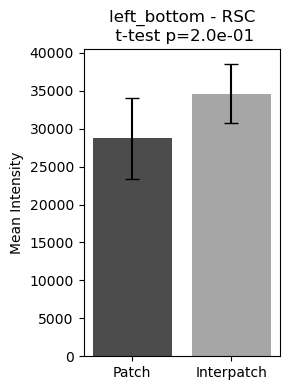

=== left_bottom - ACC ===
  Patch means per animal:       [32717.71530774 34180.03640383 35758.64356249 33058.97990234]
  Interpatch means per animal:  [31335.95066712 33128.85774618 24634.25955622 29861.25712685]
  Paired t-test p = 1.74e-01
  KS test p       = 2.29e-01



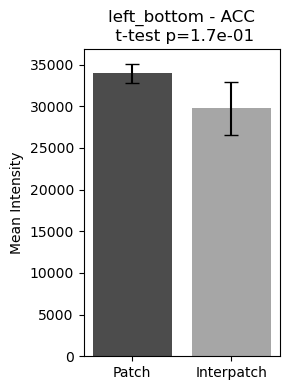

=== left_middle - RSC ===
  Patch means per animal:       [42681.01091677 31060.10257514 28001.18519436 32484.34371379]
  Interpatch means per animal:  [17129.92477524 33607.94344244 24301.05749178 36311.85506439]
  Paired t-test p = 4.63e-01
  KS test p       = 7.71e-01



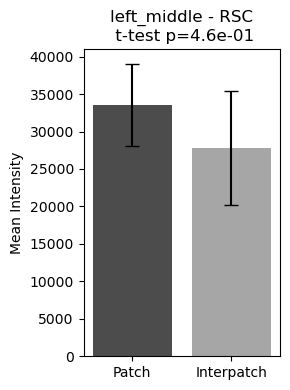

=== left_middle - ACC ===
  Patch means per animal:       [36031.26141566 34548.80969801 30607.16233391 32727.89643685]
  Interpatch means per animal:  [27715.5431888  30776.17679804 30997.26547675 32185.23995823]
  Paired t-test p = 2.17e-01
  KS test p       = 2.29e-01



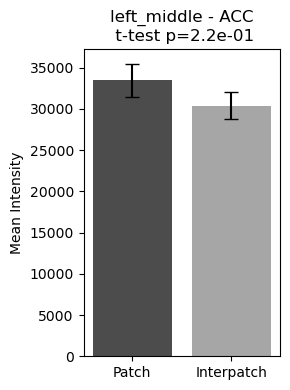

=== left_upper - RSC ===
  Patch means per animal:       [30232.69451104 37314.53398301 29045.32322127 28457.9667408 ]
  Interpatch means per animal:  [19998.83995381 17844.79320988 24737.57450434 12589.86671354]
  Paired t-test p = 3.29e-02
  KS test p       = 2.86e-02



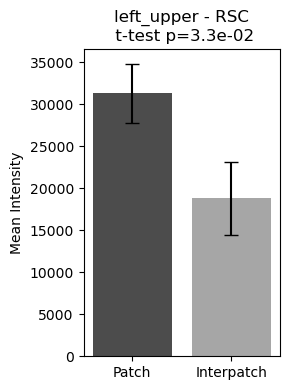

=== left_upper - ACC ===
  Patch means per animal:       [37484.56921136 34181.47134766 35804.04925723 33477.40285079]
  Interpatch means per animal:  [31181.27424942 29989.50141808 27226.64560099 30610.00321414]
  Paired t-test p = 2.19e-02
  KS test p       = 2.86e-02



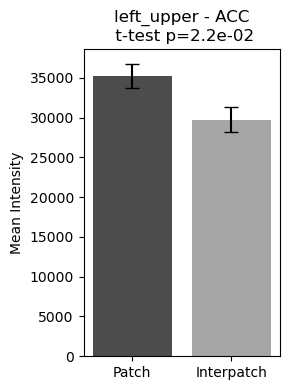

In [50]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ks_2samp

#############################################
# 1. Define your parameters
#############################################

animal_ids = [99, 118, 80, 82]   # Example animal IDs
region_names = ["left_bottom", "left_middle", "left_upper"] 
areas = ["RSC", "ACC"]           # We have RSC.tif and ACC.tif in each region folder

#############################################
# 2. Create a data structure to store
#    per-animal mean intensities, rather than all pixels.
#############################################
data_means = {}

# We'll store data like:
#   data_means[region][area]["patch"]      -> list of floats (means), one per animal
#   data_means[region][area]["interpatch"] -> list of floats, one per animal
for region in region_names:
    data_means[region] = {}
    for area in areas:
        data_means[region][area] = {
            "patch": [],
            "interpatch": []
        }

#############################################
# 3. Loop over each animal & region, load images & masks, 
#    compute mean intensities in patch / interpatch 
#    for RSC & ACC, store them.
#############################################

for aid in animal_ids:
    for region in region_names:
        base_dir = f"./{aid}/{region}"

        # Construct file paths
        rsc_path = f"{base_dir}/RSC.tif"
        acc_path = f"{base_dir}/ACC.tif"
        patch_path = f"{base_dir}/patchmask.tif"
        interpatch_path = f"{base_dir}/interpatchmask.tif"

        # Read the 2D images
        rsc_img = tifffile.imread(rsc_path)
        acc_img = tifffile.imread(acc_path)
        patch_img = tifffile.imread(patch_path)
        interpatch_img = tifffile.imread(interpatch_path)

        # Convert mask to boolean (assuming white=255 => True)
        patch_mask = (patch_img == 255)
        interpatch_mask = (interpatch_img == 255)

        # Extract intensities for RSC
        rsc_patch_vals = rsc_img[patch_mask]
        rsc_interpatch_vals = rsc_img[interpatch_mask]

        # Extract intensities for ACC
        acc_patch_vals = acc_img[patch_mask]
        acc_interpatch_vals = acc_img[interpatch_mask]

        # Compute mean intensities
        rsc_patch_mean = rsc_patch_vals.mean() if len(rsc_patch_vals) > 0 else 0
        rsc_interpatch_mean = rsc_interpatch_vals.mean() if len(rsc_interpatch_vals) > 0 else 0
        acc_patch_mean = acc_patch_vals.mean() if len(acc_patch_vals) > 0 else 0
        acc_interpatch_mean = acc_interpatch_vals.mean() if len(acc_interpatch_vals) > 0 else 0

        # Optional normalization for RSC 
        #   - If you want to normalize by the patch mean, do so, but here let's store the 
        #     "raw" means for each region. If you still want to do the same normalization as before, 
        #     you can do:
        # if rsc_patch_mean > 0:
        #     rsc_interpatch_mean = rsc_interpatch_mean / rsc_patch_mean
        #     rsc_patch_mean = 1.0
        #
        # Similarly for ACC. But if your goal is "Approach C" stats, 
        # you might keep them raw to see the actual difference.

        # Store these means in our data structure
        data_means[region]["RSC"]["patch"].append(rsc_patch_mean)
        data_means[region]["RSC"]["interpatch"].append(rsc_interpatch_mean)
        
        data_means[region]["ACC"]["patch"].append(acc_patch_mean)
        data_means[region]["ACC"]["interpatch"].append(acc_interpatch_mean)

#############################################
# 4. Now each data_means[region][area]["patch"] 
#    is a list of 4 floats (one per animal).
#############################################

# Let's do a simple analysis: For each region x area, we do:
#  - print the means
#  - do a paired t-test (or KS test) across animals
#  - make a small bar plot

for region in region_names:
    for area in areas:
        patch_means = np.array(data_means[region][area]["patch"])
        interpatch_means = np.array(data_means[region][area]["interpatch"])

        # Paired t-test: Are patch vs. interpatch different across the same animals?
        t_stat, p_val_ttest = ttest_rel(patch_means, interpatch_means)

        # KS test across the same means (though less common with N=4)
        ks_stat, p_val_ks = ks_2samp(patch_means, interpatch_means)

        print(f"=== {region} - {area} ===")
        print("  Patch means per animal:      ", patch_means)
        print("  Interpatch means per animal: ", interpatch_means)
        print(f"  Paired t-test p = {p_val_ttest:.2e}")
        print(f"  KS test p       = {p_val_ks:.2e}\n")

        # Optionally, make a bar plot showing the average across animals
        patch_mean_of_means = patch_means.mean()
        patch_std_of_means = patch_means.std()
        inter_mean_of_means = interpatch_means.mean()
        inter_std_of_means = interpatch_means.std()

        labels = ["Patch", "Interpatch"]
        yvals = [patch_mean_of_means, inter_mean_of_means]
        yerr = [patch_std_of_means, inter_std_of_means]

        x_pos = np.arange(len(labels))

        plt.figure(figsize=(3,4))
        plt.bar(x_pos, yvals, yerr=yerr, alpha=0.7, capsize=5, color=['black','gray'])
        plt.xticks(x_pos, labels)
        plt.ylabel("Mean Intensity")
        plt.title(f"{region} - {area}\n t-test p={p_val_ttest:.1e}")
        plt.tight_layout()
        plt.show()
